# **E-COMMERCE CUSTOMER CHURN ANALYSIS**
BY: JONATHAN KURNIAWAN AGAY

## **BUSINESS PROBLEM UNDERSTANDING**

**CONTEXT:**\
Sebuah Perusahaan E-Commerce (Platform X) ingin mengetahui customer - customer yang akan berpindah ke perusahaan E-commerce lain(Berhenti menggunakan layanan E-commerce tersebut), sehingga membutuhkan data analyst untuk mengetahui kriteria - kriteria pelanggan yang akan melakukan *`churning`* berdasarkan data dan dapat melakukan pendekatan serta menawarkan promo - promo khusus.

Target:\
0: Non-Churning customer (tidak berpindah)\
1: Churning customer (berpindah ke E-commerce lain)

**PROBLEM STATEMENT:**\
Proses pendekatan dan penawaran promo khusus apabila dilakukan terhadap seluruh customer, dapat memakan waktu yang cukup banyak atau bahkan menurunkan pendapatan bruto perusahaan E-commerce tersebut. Promo khusus dibuat untuk pelanggan - pelanggan yang akan berpindah (*`churning`*) sehingga pelanggan tersebut dapat tetap melanjutkan untuk menggunakan platform E-commerce ini untuk melakukan pembelian produk.

Adapun konsekuensi apabila promo - promo khusus tersebut diberikan untuk seluruh pelanggan, yakni:
- Biaya promosi menjadi lebih tinggi dan tidak terarah.
- perusahaan dapat kehilangan potensi keuntungan atau bahkan menderita kerugian.

**GOALS:**\
Maka dari itu, berdasarkan data - data yang ada, perusahaan ingin mengetahui kriteria - kriteria pelanggan yang akan berpindah ke paltform E-commerce lainnya, sehingga dapat secara efisien melakukan pendekatan dan memberikan penawaran yang menarik untuk masing - masing kriteria pelanggan yang berpotensi untuk churn.

**APPROACH:**\
Melakukan analisa data untuk menentukan pola dan kriteria pelanggan yang loyal dan yang akan berpindah platform (*`churning`*). Kita akan menggunakan model klasifikasi, dan menentukan model mana yang terbaik berdasarkan nilai accuracy, precision, atau recall tertinggi.


**Metric Evaluation**

<img src='confusion matrix - ecommerce churn.png'>

**Type 1 Error - False Positive**\
Konsekuensi: Biaya promosi bertambah, kehilangan potensi keuntungan.

**Type 2 Error - False Negative**\
Konsekuensi: Pelanggan melakukan churn tanpa terdeteksi sehingga tidak ada upaya untuk melakukan pendekatan dan penawaran.

Dari kedua konsekuensi diatas, dalam jangka panjang, perusahaan akan lebih dirugikan apabila kehilangan pelanggan tanpa dapat melakukan upaya pendekatan dan memberikan promosi kepada pelanggan - pelanggan yang berpotensi untuk churn. Maka dari itu kita lebih memfokuskan pada nilai *`false negative`* sekecil mungkin atau nilai *`Recall`* yang tinggi. Maka dari itu, kita akan mencari model dengan  **F2 Score** tertinggi.

**F2 Score**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>F</mi>
    <mi>&#x3B2;</mi>
  </msub>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mo stretchy="false">(</mo>
      <mn>1</mn>
      <mo>+</mo>
      <msup>
        <mi>&#x3B2;</mi>
        <mn>2</mn>
      </msup>
      <mo stretchy="false">)</mo>
      <mtext>tp</mtext>
    </mrow>
    <mrow>
      <mo stretchy="false">(</mo>
      <mn>1</mn>
      <mo>+</mo>
      <msup>
        <mi>&#x3B2;</mi>
        <mn>2</mn>
      </msup>
      <mo stretchy="false">)</mo>
      <mtext>tp</mtext>
      <mo>+</mo>
      <mtext>fp</mtext>
      <mo>+</mo>
      <msup>
        <mi>&#x3B2;</mi>
        <mn>2</mn>
      </msup>
      <mtext>fn</mtext>
    </mrow>
  </mfrac>
</math>

## **ATTRIBUTE INFORMATION**

- Tenure: Tenure of a customer in the company.
- WarehouseToHome: Distance between the warehouse to the customer’s home.
- NumberOfDeviceRegistered: Total number of deceives is registered on a particular customer.
- PreferedOrderCat: Preferred order category of a customer in the last month.
- SatisfactionScore: Satisfactory score of a customer on service.
- MaritalStatus: Marital status of a customer.
- NumberOfAddress: Total number of added on a particular customer.
- Complaint: Any complaint has been raised in the last month.
- DaySinceLastOrder: Day since last order by customer.
- CashbackAmount: Average cashback in last month
- Churn: Churn flag.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

from phik import phik_matrix
from scipy.stats import chi2_contingency

# Feature Engineering
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler , MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile
import category_encoders as ce

# Evaluation Method
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer,classification_report, precision_score, recall_score, f1_score, accuracy_score, fbeta_score
from sklearn.feature_selection import SelectKBest, chi2

#Sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, ClusterCentroids, TomekLinks, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data_ecommerce_customer_churn.csv')
display((data).head(),data.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [6]:
pd.set_option('display.max_colwidth', 100)

listcolumn = []
for col in data.columns:
    listcolumn.append([col, 
                      data[col].dtype,
                      data[col].isna().sum(),
                      round(data[col].isna().sum()/len(data)*100,2),
                      data[col].nunique(),
                      data[col].unique()])
pd.DataFrame(columns=['Column Name', 'Data Type', 'Null Values Count','Null pct(%)','Total Unique Values', 'Unique Samples'], data=listcolumn)

,Column Name,Data Type,Null Values Count,Null pct(%),Total Unique Values,Unique Samples
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 3..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, ..."


1. Dari 9 features yang akan digunakan, terdapat 7 features bersifat numerik (`Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, `Complain`, `DaySinceLastOrder`, `Cashback Amount`, `Churn`) dan 2 features bersifat categoric (`PreferedOrderCat` & `MaritalStatus`).
2. Terdapat missing values pada kolom `Tenure`, `WarehouseTohome`, dan `DaySinceLastOrder`. Masing - masing kolom memiliki nilai missing values kurang dari 10%.
3. Kolom `PreferedOrderCat` terdapat structural error yakni data `Mobile` dan `Mobile Phone` yang tidak konsisten. Kedua data tersebut memeiliki makna yang sama, sehingga mereka akan disamakan dalam proses data cleaning.
4. Kolom `MaritalStatus` dan `PreferedOrderedCat` masing - masing akan di encode menggunakan `oneHotEncoder`.

## **DATA CLEANING**

### **DUPLICATE VALUES**

In [7]:
# Checking for Duplicate Values
print(f'There are {data.duplicated().sum()} duplicate values in this dataset.')
dupes = data[data.duplicated()]
dupes.head()

There are 671 duplicate values in this dataset.


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0


In [8]:
# Drop duplicate values
data.drop_duplicates(keep='first', inplace=True)
print(f'Total dataset setelah dilakukan penghapusan duplikat sebanyak {data.shape[0]} baris dan {data.shape[1]} kolom')

Total dataset setelah dilakukan penghapusan duplikat sebanyak 3270 baris dan 11 kolom


Terdapat 671 data duplikat dalam dataset. Data duplikat tidak memberikan value tambahan apapun saat digunakan, dan akan memperlama proses pengolahan data, maka kita hapus data - data duplikat tersebut. Total baris dalam dataset sebelum dilakukan penghapusan duplikat sebanyak 3941 baris, dan setelah dilakukan penghapusan data duplikat menjadi 3270 baris.

### **STRUCTURAL ERRORS**

Terdapat data yang tidak konsisten pada kolom `PreferedOrderCat`.
- Mobile
- Mobile Phone

Kedua data ini memiliki arti yang sama tapi ada 2 penamaan, sehingga kita samakan saja.

In [9]:
print(f'Data dengan kategori Mobile pada kolom PrefredOrderCat : {data[data['PreferedOrderCat'] == 'Mobile']['PreferedOrderCat'].count()}')
print(f'Data dengan kategori Mobile Phone pada kolom PrefredOrderCat : {data[data['PreferedOrderCat'] == 'Mobile Phone']['PreferedOrderCat'].count()}')

Data dengan kategori Mobile pada kolom PrefredOrderCat : 458
Data dengan kategori Mobile Phone pada kolom PrefredOrderCat : 725


In [10]:
# Membetulkan Kesalahan struktural - data yang tidak konsisten

data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [11]:
print(f'Data dengan kategori Mobile pada kolom PrefredOrderCat : {data[data['PreferedOrderCat'] == 'Mobile']['PreferedOrderCat'].count()}')
print(f'Data dengan kategori Mobile Phone pada kolom PrefredOrderCat : {data[data['PreferedOrderCat'] == 'Mobile Phone']['PreferedOrderCat'].count()}')

Data dengan kategori Mobile pada kolom PrefredOrderCat : 0
Data dengan kategori Mobile Phone pada kolom PrefredOrderCat : 1183


### **Analisa Outliers pada Data**

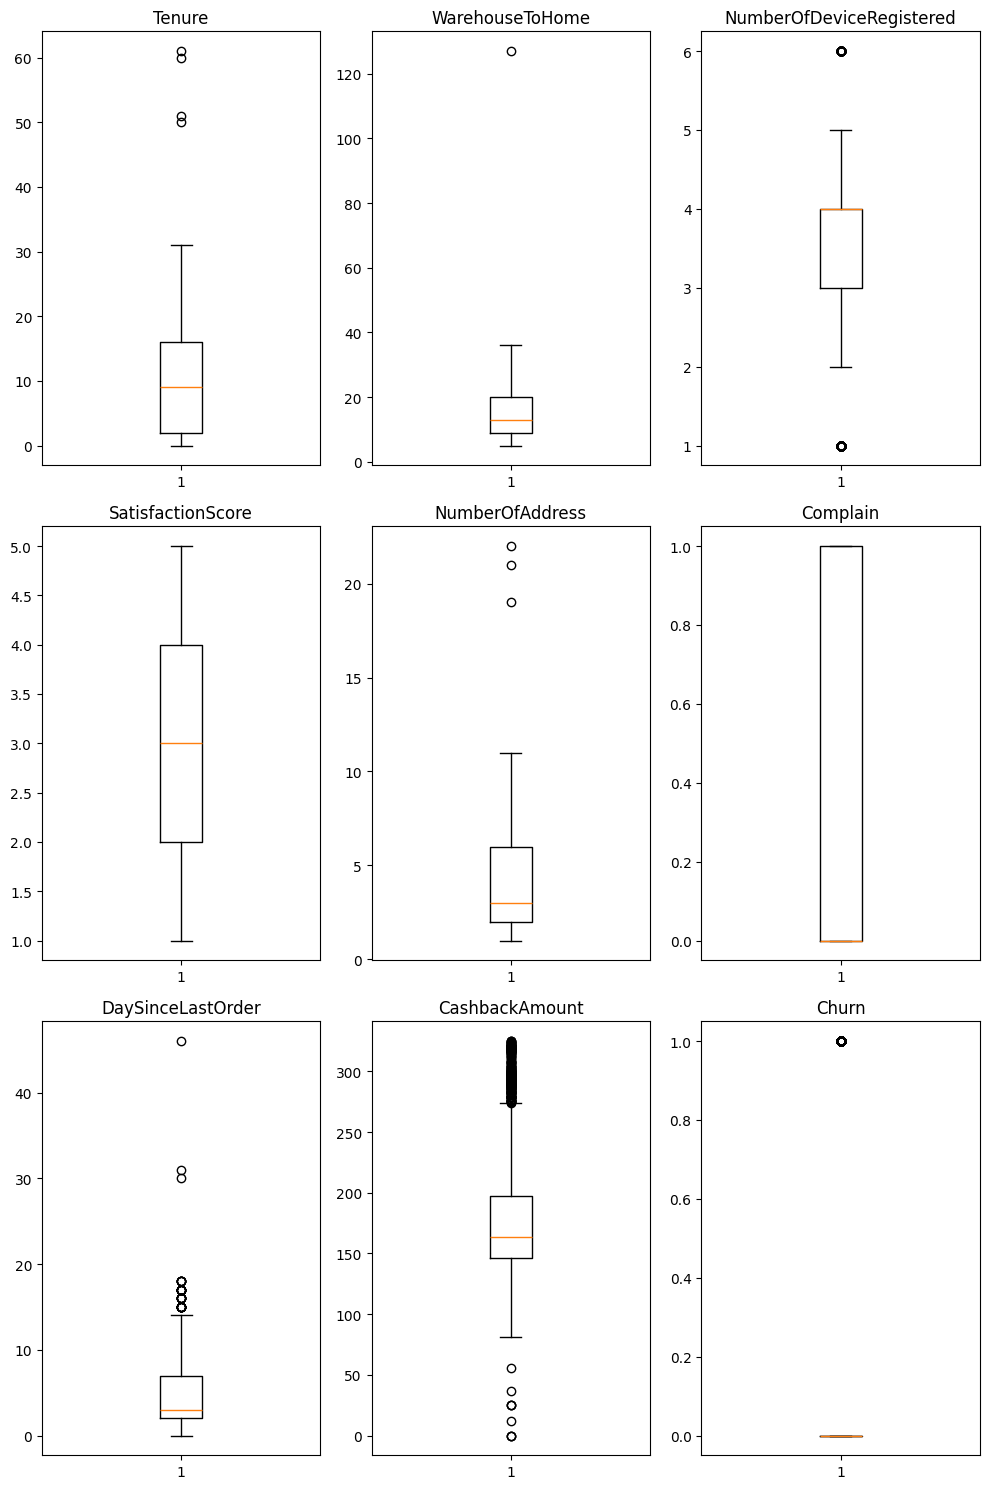

In [12]:
# Outliers - Boxplot
number_col = data.select_dtypes(include=['float64', 'int64']).columns
num_col = len(number_col)
num_row = (num_col//3)+(num_col%3>0)

plt.figure(figsize=(10,15))
for i, column in enumerate(number_col,1):
    plt.subplot(num_row,3,i)
    plt.boxplot(data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

In [13]:
data[data['DaySinceLastOrder'] > 15]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
169,17.0,34.0,3,Grocery,5,Divorced,4,0,17.0,263.28,0
181,3.0,11.0,3,Mobile Phone,5,Married,6,0,30.0,132.04,0
235,18.0,35.0,4,Grocery,5,Married,5,0,18.0,288.28,0
256,29.0,21.0,2,Others,4,Single,10,0,16.0,312.22,0
486,13.0,7.0,3,Grocery,5,Married,3,0,16.0,268.23,0
547,16.0,11.0,4,Others,2,Divorced,3,0,16.0,317.32,0
739,25.0,9.0,4,Grocery,5,Divorced,2,0,16.0,268.56,0
800,15.0,13.0,4,Mobile Phone,5,Single,4,1,18.0,172.21,0
891,17.0,13.0,4,Fashion,1,Married,4,0,17.0,202.48,0
1339,14.0,12.0,3,Mobile Phone,5,Single,3,1,17.0,147.21,0


Terdapat extreme outliers pada kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `DaySinceLastOrder`, & `CashbakAmount`. Outliers - outliers pada kolom - kolom tersebut akan dihapus sehingga tidak akan digunakan ke dalam model, kecuali outliers pada kolom `DaySinceLastOrder` & `CashbakAmount` karena melihat data tersebut sangat kecil kemungkinannya untuk terjadi kesalahan.

In [14]:
# Handling Extreme Outliers

data = data[~((data['Tenure'] > 40) | (data['WarehouseToHome'] > 60) | (data['NumberOfAddress'] > 15))]
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


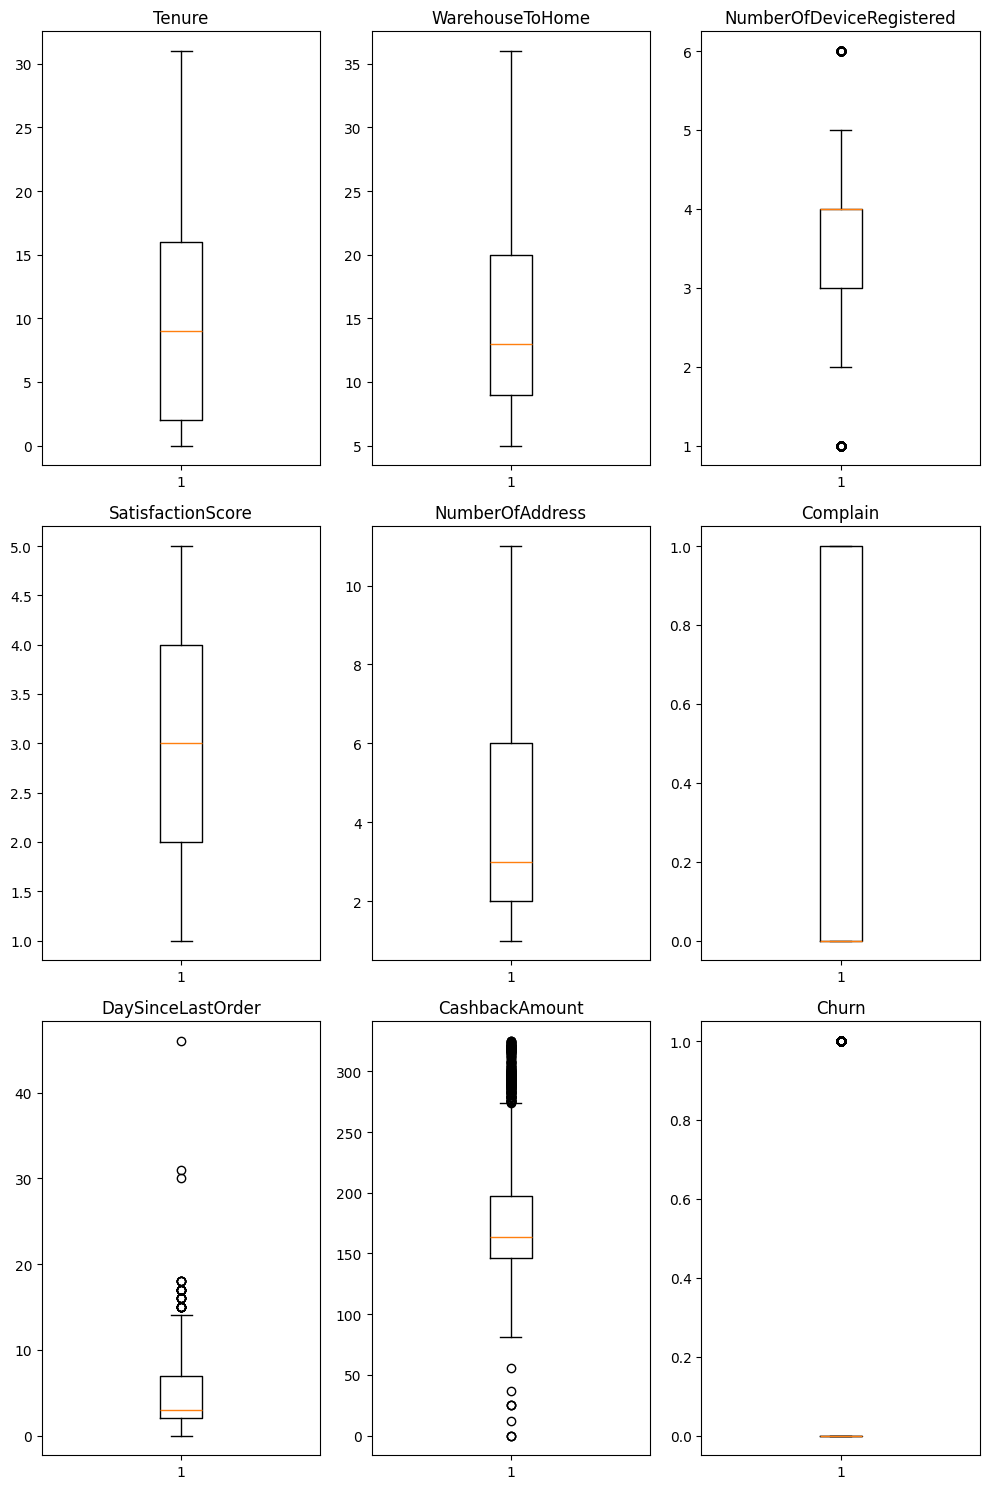

In [15]:
# Outliers - Boxplot
number_col = data.select_dtypes(include=['float64', 'int64']).columns
num_col = len(number_col)
num_row = (num_col//3)+(num_col%3>0)

plt.figure(figsize=(10,15))
for i, column in enumerate(number_col,1):
    plt.subplot(num_row,3,i)
    plt.boxplot(data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

Dari Seluruh Boxplot diatas, dapat dilihat bahwa distribusi data sudah normal. Tidak ada Outliers yang terlalu menyimpang dari kumpulan data lainnya. Total ada 11 baris yuang dihapus. Total data yang akan digunakan sebanyak 3262 setelah dilakukan penghapusan duplicate values dan pembersihan outliers.

### **HANDLING MISSING VALUES**

In [16]:
data[data['DaySinceLastOrder'].isna()]['Churn'].value_counts()

Churn
0    151
1     30
Name: count, dtype: int64

In [17]:
round(data[data['DaySinceLastOrder'].isna()]['Churn'].value_counts()/len(data[data['DaySinceLastOrder'].isna()])*100,2)

Churn
0    83.43
1    16.57
Name: count, dtype: float64

In [18]:
# Rechecking missing Values after Removing Duplicate Data
missingVal = []
for col in data.columns:
    missingVal.append([col, data[col].isna().sum(), round(data[col].isna().sum()/len(data)*100,2)])

pd.DataFrame(data=missingVal, columns=['Name','Missing Value','Null pct(%)'])

,Name,Missing Value,Null pct(%)
0,Tenure,159,4.87
1,WarehouseToHome,135,4.14
2,NumberOfDeviceRegistered,0,0.00
3,PreferedOrderCat,0,0.00
4,SatisfactionScore,0,0.00
5,MaritalStatus,0,0.00
6,NumberOfAddress,0,0.00
7,Complain,0,0.00
8,DaySinceLastOrder,181,5.55
9,CashbackAmount,0,0.00


Terdapat missing values pada kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder`. Masing - masing kolom memiliki persentase missing values kurang lebih 5% dari keseluruhan data. Ketiga kolom tersebut memuat variable bersifat numerik.

Untuk menganani Missing values, kita dapat melakukan penghapusan (drop) baris/kolom yang memuat *Missing Values*, atau mengisi *Missing values* dengan nilai sebenarnya, atau nilai yang paling mendekati dengan nilai aslinya. kita juga dapat mengisi *Missing Values* dengan angka *mean*, *median* atau *modus*.

Pada kasus kali ini, kita akan mencoba mengisi missing value menggunakan KNN imputer.

In [19]:
knn_imputer = KNNImputer()
data[['Tenure', 'WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder']] = knn_imputer.fit_transform(data[['Tenure', 'WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder']])

In [20]:
# Making sure data sudah bersih dari missing values.

data.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [21]:
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4.0,Laptop & Accessory,3.0,Single,2.0,0.0,7.0,143.32,0
1,7.0,25.0,4.0,Mobile Phone,1.0,Married,2.0,0.0,7.0,129.29,0
2,27.0,13.0,3.0,Laptop & Accessory,1.0,Married,5.0,0.0,7.0,168.54,0
3,20.0,25.0,4.0,Fashion,3.0,Divorced,7.0,0.0,2.4,230.27,0
4,30.0,15.0,4.0,Others,4.0,Single,8.0,0.0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5.0,Fashion,4.0,Married,7.0,0.0,8.0,249.90,0
3935,26.0,7.0,4.0,Grocery,1.0,Married,4.0,0.0,9.0,295.99,0
3936,28.0,9.0,5.0,Fashion,3.0,Married,8.0,0.0,1.0,231.86,0
3937,8.0,7.0,2.0,Mobile Phone,2.0,Single,4.0,0.0,4.0,157.80,0


## **DATA ANALYSIS**

In [22]:
display(data['Churn'].value_counts(),data['Churn'].value_counts()/len(data)*100)


Churn
0    2729
1     533
Name: count, dtype: int64

Churn
0    83.660331
1    16.339669
Name: count, dtype: float64

Dari data diatas kita dapat mengetahui:
- Dari 3262 pelanggan, 2729 tidak Churn dan 533 melakukan churning.
- Sebanyak 83.7% pelanggan dari keseluruhan dataset tidak melakukan `churning`.
- Sedangkan, 16.3% pelanggan lainnnya melakukan `Churning` atau berpindah ke platform E-commerce lainnya.
- Data Customer Churn tidak balance.

Atau dengan kata lain, Churn Rate perusahaan E-commerce ini adalah **16%**.

Churn Rate yang ideal pada sebuah perusahaan yang sudah matang & stabil ada pada angka 5% - 7% per tahun atau kurang dari 1% per bulannya. Pada perusahaan *early-stage startups* churn rate nya 10% - 15%. Artinya *Churn Rate* perusahaan E-commerce ini diatas rata - rata/tinggi.

Karena data churn tidak balance, kita akan lakukan balancing data menggunakan library imblearn. Kita dapat menggunakan metode Resampling (undersampling, oversampling) atau menggunakan *algorithm based method* seperti Penalized method atau metode machine learning tertentu.

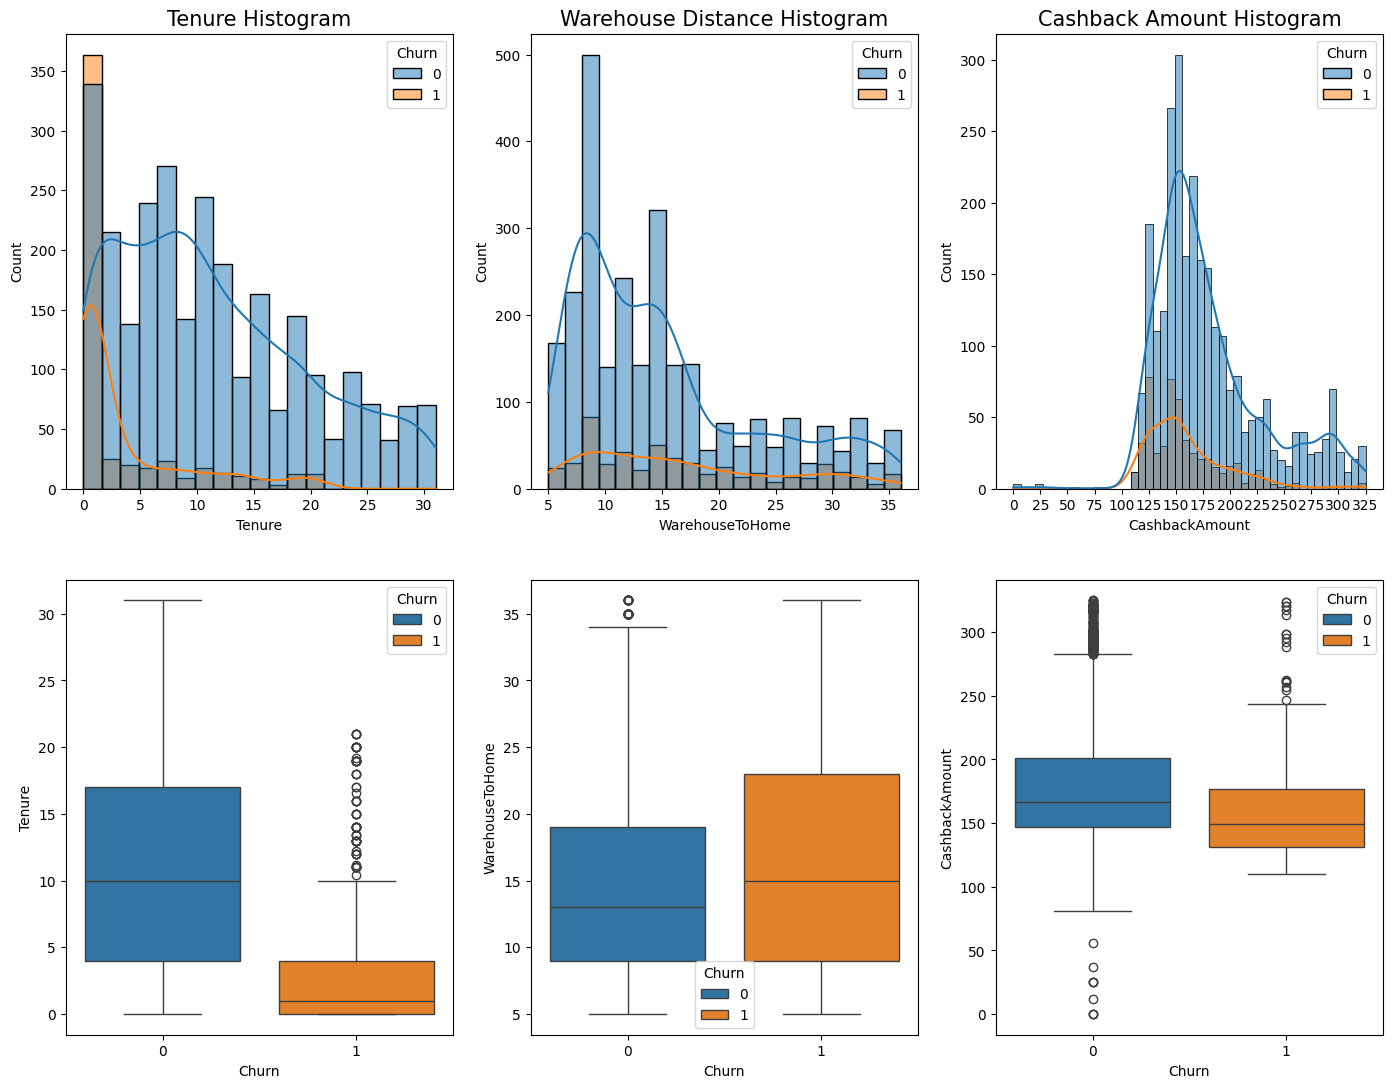

In [23]:
plt.figure(figsize=(17,13))
color=['blue', 'orange']

plt.subplot(2,3,1)
sns.histplot(data=data,x='Tenure',hue='Churn',kde=True)
plt.title('Tenure Histogram',fontsize=15)

plt.subplot(2,3,2)
sns.histplot(data=data,x='WarehouseToHome',hue='Churn',kde=True)
plt.title('Warehouse Distance Histogram',fontsize=15)

plt.subplot(2,3,3)
sns.histplot(data=data, x='CashbackAmount', hue='Churn', kde=True)
plt.title('Cashback Amount Histogram',fontsize=15)
plt.xticks(np.arange(0,326,25))

plt.subplot(2,3,4)
sns.boxplot(data=data,y='Tenure', x='Churn', hue='Churn')

plt.subplot(2,3,5)
bplot2=sns.boxplot(data=data,y='WarehouseToHome', x='Churn', hue='Churn')

plt.subplot(2,3,6)
bplot3=sns.boxplot(data=data,y='CashbackAmount', x='Churn', hue='Churn')

plt.show()

- `Tenure`: Dari histogram diatas, dapat disimpulkan bahwa customer churn banyak terjadi pada Tenure rendah, Tenure yuang rendah artinya semakin baru pelanggan tersebut. Semakin tinggi Tenure, semakin loyal pelanggan tersebut kepada perusahaan atau semakin jarang pelanggan melakukan churn.

- `WarehouseToHome` : Histogram Warehouse Distance menggambarkan jarak antara Warehouse (gudang) dengan rumah pelanggan. Dapat dilihat pada histogram tersebut bahwa distribusi `WarehouseToHome` antara customer Churn dan tidak churn tidak jauh berbeda.

- `CashbackAmount` : Distribusi Data `CashbackAmount` antara customer churn dan tidak churn juga cenderung sama. Namun dapat dilihat terdapat lonjakan yang cukup tinggi pada customer yang churn pada `CashbackAmount` antara $120 - $150.

Churn
0    11.237083
1     3.431895
Name: Tenure, dtype: float64


Text(0.5, 1.0, 'Customer Churn by Tenure Mean')

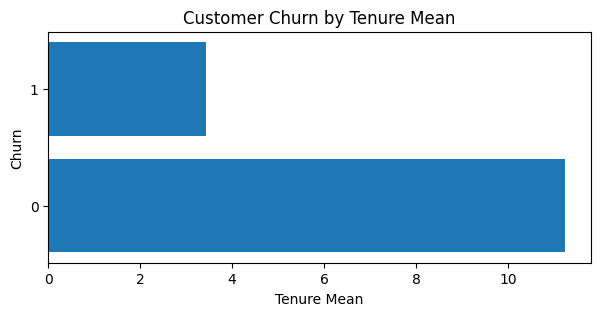

In [24]:
data_tenure = data.groupby('Churn')['Tenure'].mean()
print(data_tenure)

plt.figure(figsize=(7,3))
plt.barh(data_tenure.index, data_tenure.values)
plt.ylabel('Churn')
plt.yticks(np.arange(0,2,1))
plt.xlabel('Tenure Mean')
plt.title('Customer Churn by Tenure Mean')

Dari grafik diatas, dapat kita lihat bahwa rata - rata Tenure bagi pelanggan - pelanggan setia ada berada pada angka 11.5, sedangkan nilai rata - rata tenure bagi pelanggan Churning adalah 3. Itu artinya semakin tinggi nilai rata - rata Tenure (jangka waktu rata - rata pelanggan bertahan dengan Platform X), semakin besar kemungkinan mereka akan tetap loyal.

Churn
0    13.0
1    15.0
Name: WarehouseToHome, dtype: float64


Text(0.5, 1.0, "Distance from Warehouse to Customer's home")

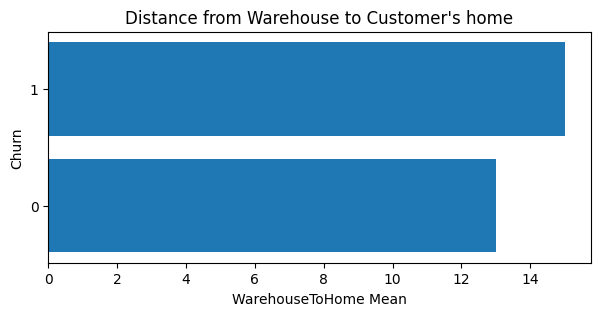

In [209]:
WHmean = data.groupby('Churn')['WarehouseToHome'].median()
print(WHmean)

plt.figure(figsize=(7,3))
plt.barh(WHmean.index, WHmean.values)
plt.ylabel('Churn')
plt.yticks(np.arange(0,2,1))
plt.xlabel('WarehouseToHome Mean')
plt.title("Distance from Warehouse to Customer's home")

Rata - rata jarak antara warehouse E-commerce dan rumah pelanggan yang melakukan churn sedikit lebih jauh dibandingkan rata  - rata jarak Warehouse dan ruamh pelanggan yang tidak churn. Perbandingan antara jarak rumah customer churn dan tidak churn tidak terlalu besar. kemungkinan korelasi antara kedua variabel ini kecil, sehingga memungkinkan untuk drop feature `WarehouseToHome`.

Churn
0    166.23
1    149.63
Name: CashbackAmount, dtype: float64


Text(0.5, 1.0, 'Cashback Amount Median by Churn')

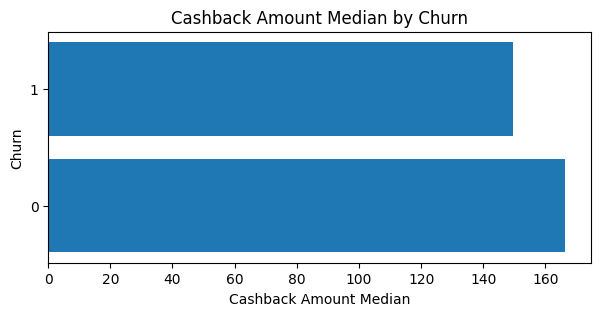

In [210]:
CBamount = data.groupby('Churn')['CashbackAmount'].median()
print(CBamount)

plt.figure(figsize=(7,3))
plt.barh(CBamount.index, CBamount.values)
plt.ylabel('Churn')
plt.yticks(np.arange(0,2,1))
plt.xlabel('Cashback Amount Median')
plt.title("Cashback Amount Median by Churn")

In [199]:
devChurn = pd.crosstab(data['NumberOfDeviceRegistered'], data['Churn'])
satChurn = pd.crosstab(data['SatisfactionScore'], data['Churn'])
addChurn = pd.crosstab(data['NumberOfAddress'], data['Churn'])
dayChurn = pd.crosstab(data['DaySinceLastOrder'], data['Churn'])

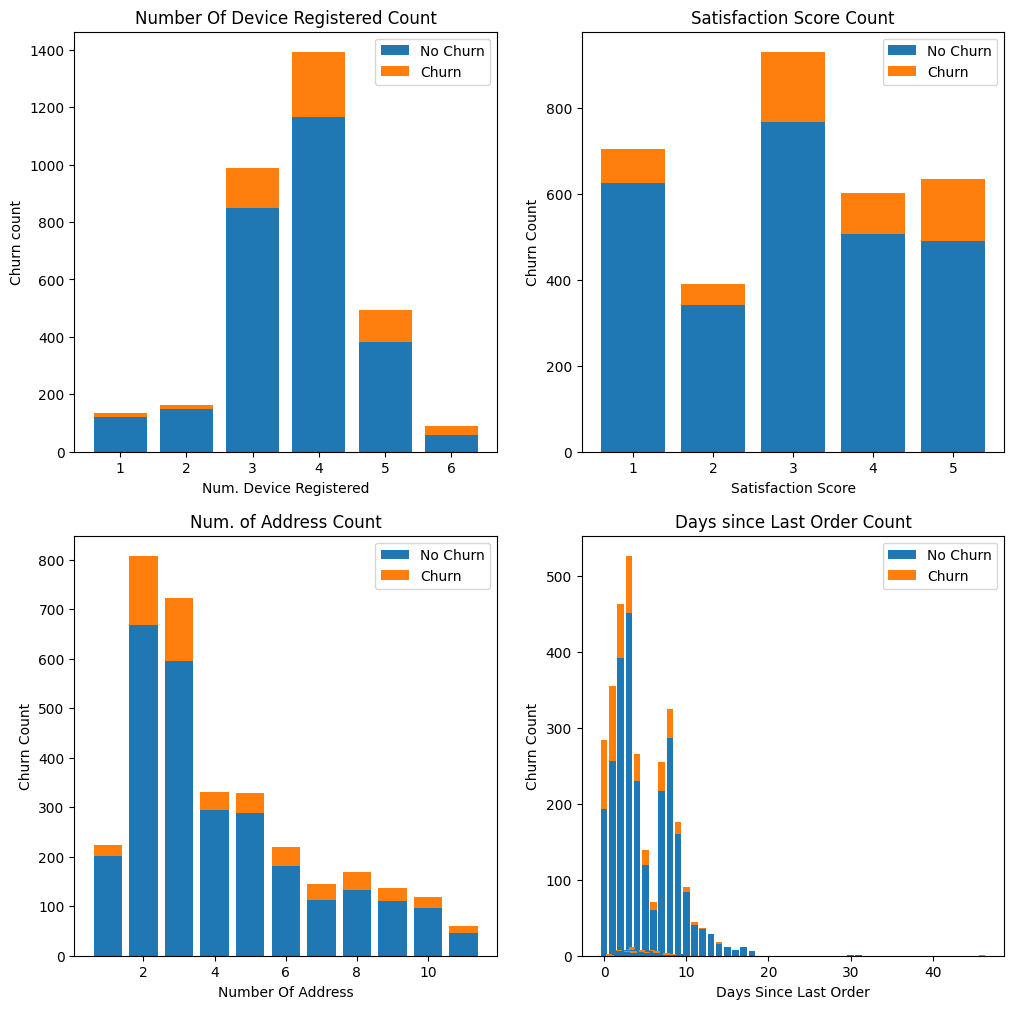

In [200]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
bar1 = plt.bar(x=devChurn.index, height=devChurn[0], label='No Churn')
bar2 = plt.bar(x=devChurn.index, height=devChurn[1], bottom=devChurn[0], label='Churn')
plt.ylabel('Churn count')
plt.xlabel('Num. Device Registered')
plt.title('Number Of Device Registered Count')
plt.legend()

plt.subplot(2,2,2)
bar1 = plt.bar(x=satChurn.index, height=satChurn[0], label='No Churn')
bar2 = plt.bar(x=satChurn.index, height=satChurn[1], bottom=satChurn[0], label='Churn')
plt.ylabel('Churn Count')
plt.xlabel('Satisfaction Score')
plt.title('Satisfaction Score Count')
plt.legend()

plt.subplot(2,2,3)
bar1 = plt.bar(x=addChurn.index, height=addChurn[0], label='No Churn')
bar2 = plt.bar(x=addChurn.index, height=addChurn[1], bottom=addChurn[0], label='Churn')
plt.ylabel('Churn Count')
plt.xlabel('Number Of Address')
plt.title('Num. of Address Count')
plt.legend()

plt.subplot(2,2,4)
bar1 = plt.bar(x=dayChurn.index, height=dayChurn[0], label='No Churn')
bar2 = plt.bar(x=dayChurn.index, height=dayChurn[1], bottom=dayChurn[0], label='Churn')
plt.ylabel('Churn Count')
plt.xlabel('Days Since Last Order')
plt.title('Days since Last Order Count')
plt.legend()

**Customer Complain**

In [27]:
# DATA - COMPLAIN
data_complain = pd.crosstab(data['Churn'], data['Complain'])
data_complain.rename(columns={0:'No Complain', 1:'Complained'}, inplace=True)
data_complain

Complain,No Complain,Complained
Churn,,
0,2103,626
1,241,292


In [28]:
NC_pct = round(data_complain['No Complain']/data_complain['No Complain'].sum()*100,2)
C_pct = round(data_complain['Complained']/data_complain['Complained'].sum()*100,2)

data_complain.insert(1, 'NC pct(%)', NC_pct)
data_complain.insert(3, 'Complain pct(%)', C_pct)
data_complain

Complain,No Complain,NC pct(%),Complained,Complain pct(%)
Churn,,,,
0,2103,89.72,626,68.19
1,241,10.28,292,31.81


Complain
0.0    241
1.0    292
Name: Churn, dtype: int64

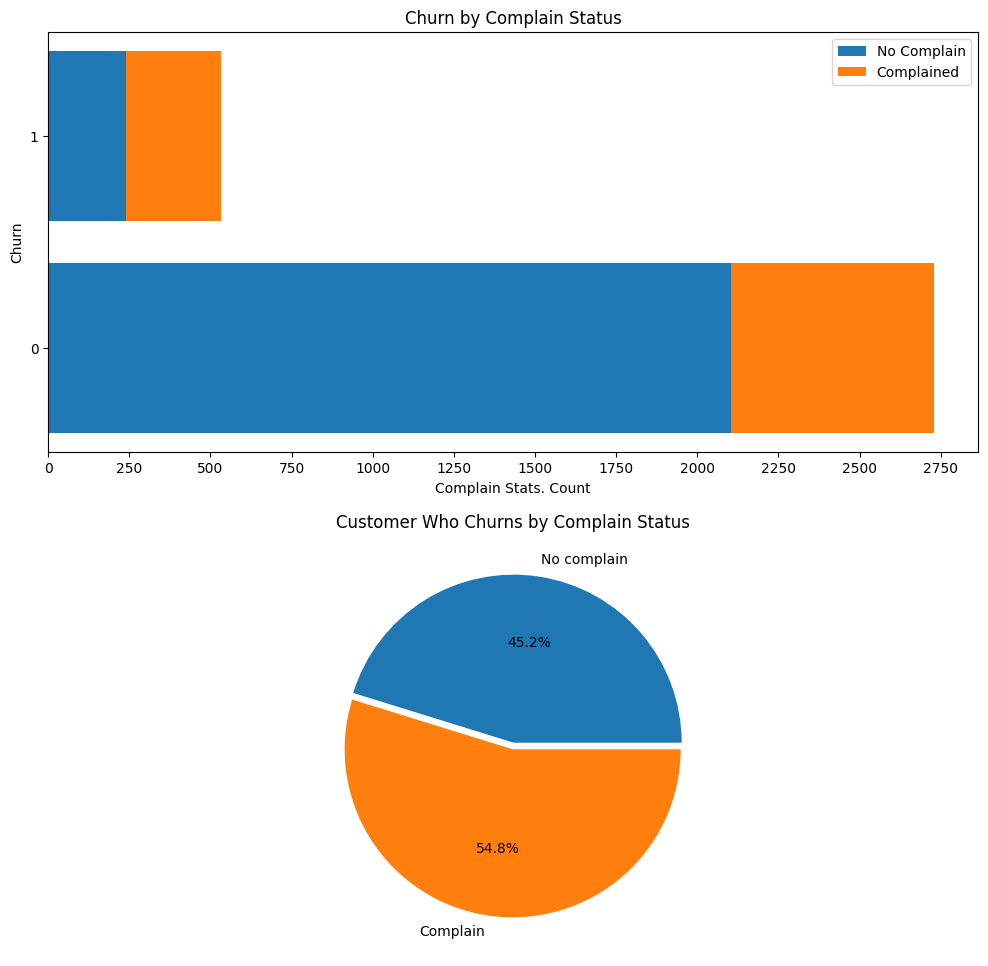

In [29]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
bar1 = plt.barh(y=data_complain.index, width=data_complain['No Complain'], label='No Complain')
bar2 = plt.barh(y=data_complain.index, width=data_complain['Complained'], left=data_complain['No Complain'], label='Complained')
plt.ylabel('Churn')
plt.xlabel('Complain Stats. Count')
plt.title('Churn by Complain Status')
plt.legend()
plt.yticks([0,1])
plt.xticks(np.arange(0,2751,250))

# Menghitung seluruh pelanggan churn berdasarkan Complain
forpie = data[data['Churn'] == 1].groupby('Complain')['Churn'].count()
display(forpie)

plt.subplot(2,1,2)
plt.pie(x = forpie, labels=['No complain', 'Complain'], explode= [0.02]*2, autopct='%.1f%%')
plt.title('Customer Who Churns by Complain Status')
plt.show()


Grafik diatas mengggambarkan Customer Churn berdasarkan status complain seorang pelanggan, apakah pelanggan melakukan complain atau tidak. Dengan nilai Churn 1 artinya pelanggan berpindah platform (`churning`) dan 0 artinya masih menggunakan platform X untuk bertransaksi. 

Pelanggan yang tidak melakukan complain lebih banyak dibandingkan pelanggan yang melakukan complain. Dari grafik diatas, kita dapat melihat bahwa pelanggan yang melakukan `churning` lebih banyak yang melakukan complain (292 orang) dibandingkan pelanggan yang TIDAK melakukan complain (240 orang). Dengan kata lain, dari 100% pelanggan yang Churn, 55% diantaranya melakukan complain dan sisanya 45% tidak melakukan complain. 

Dari sini kita dapat menyimpulkan bahwa status complain seorang pelanggan dapat sangat mempengaruhi Customer Churn.

## **Feature Engineering & Model Benchmarking**

In [31]:
display(data.head(), data.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4.0,Laptop & Accessory,3.0,Single,2.0,0.0,7.0,143.32,0
1,7.0,25.0,4.0,Mobile Phone,1.0,Married,2.0,0.0,7.0,129.29,0
2,27.0,13.0,3.0,Laptop & Accessory,1.0,Married,5.0,0.0,7.0,168.54,0
3,20.0,25.0,4.0,Fashion,3.0,Divorced,7.0,0.0,2.4,230.27,0
4,30.0,15.0,4.0,Others,4.0,Single,8.0,0.0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3933,25.0,15.0,5.0,Fashion,4.0,Married,7.0,0.0,8.0,249.90,0
3935,26.0,7.0,4.0,Grocery,1.0,Married,4.0,0.0,9.0,295.99,0
3936,28.0,9.0,5.0,Fashion,3.0,Married,8.0,0.0,1.0,231.86,0
3937,8.0,7.0,2.0,Mobile Phone,2.0,Single,4.0,0.0,4.0,157.80,0
3940,2.0,7.0,3.0,Laptop & Accessory,5.0,Married,1.0,0.0,2.0,153.73,0


1. Melakukan Scaling menggunakan Robust Scaler pada kolom `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`,`SatisfactionScore`,`NumberOfAddress`, `Complain`, `DaySinceLastOrder`,`CashbackAmount`
2. Melakukan One Hot Encoding pada kolom `PreferedOrderCat` dan `MaritalStatus`.

In [32]:
# Split Data

X = data.drop(['Churn'], axis=1)
y = data['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=2004, test_size=0.2, stratify=y)

In [33]:
xtrain

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
977,15.0,11.0,3.0,Mobile Phone,5.0,Married,4.0,0.0,2.0,125.76
2117,7.0,8.0,3.0,Laptop & Accessory,2.0,Single,2.0,0.0,4.0,162.74
1785,14.0,9.0,4.0,Laptop & Accessory,2.0,Single,3.0,0.0,9.0,171.61
2841,28.0,32.0,1.0,Others,4.0,Married,5.0,1.0,4.0,296.36
610,2.2,8.0,3.0,Mobile Phone,1.0,Married,2.0,0.0,2.0,120.14
...,...,...,...,...,...,...,...,...,...,...
180,10.0,30.0,2.0,Laptop & Accessory,1.0,Married,6.0,0.0,4.0,150.71
2934,1.0,7.0,5.0,Mobile Phone,4.0,Single,3.0,1.0,3.0,146.74
607,16.0,8.0,3.0,Laptop & Accessory,1.0,Married,2.0,0.0,7.0,156.75
2298,9.0,9.0,4.0,Fashion,1.0,Married,1.0,0.0,4.0,176.44


In [34]:
# Identifikasi kolom kategori dan numerik
categorical_cols = ['PreferedOrderCat','MaritalStatus']
numerical_cols = ['Tenure', 'WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount']

preprocessor = ColumnTransformer([
        ('Encoder', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical_cols),
        ('scaler', RobustScaler(), numerical_cols)
], remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

Text(0.5, 1.0, 'Correlation Between All Numerical Features and Target')

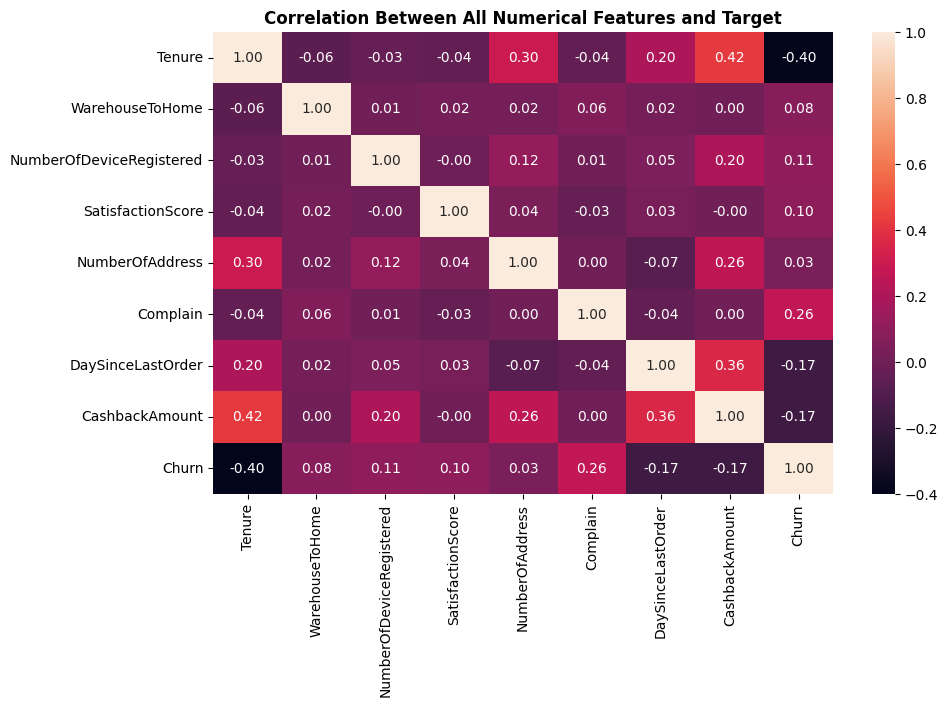

In [35]:
num_data = data.select_dtypes(include=['int64', 'float64'])

num_cor = num_data.corr('spearman')

plt.figure(figsize=(10,6))
sns.heatmap(num_cor, annot=True, fmt='.2f')
plt.title('Correlation Between All Numerical Features and Target', weight='bold')

1. `Tenure` memiliki korelasi terkuat dengan target. Korelasi sebesar -0.4 artinya feature ini memiki korelasi negatif dengan Target `Churn`. Apabila nilai feature semakin besar, maka `Churn` akan semakin jarang terjadi. Sebaliknya, apabila `Tenure` semakin kecil, Customer `Churn` akan semakin tinggi.

2. `Complain` memiliki nilai korelasi terbesar kedua dengan `Churn`. Nilai korelasi 0.26 artinya korelasi positif, yakni semakin tinggi complain akan semakin tinggi nilai customer `Churn`.

**CHI-SQUARED TEST**

Uji hipotesis hubungan antara feature dan Target

H0: Feature dengan Target Tidak Memiliki Hubungan\
H1: Feature dengan Target Memiliki hubungan (dependent)\
pval < 0.05 = tolak H0

In [36]:
# Chi2 Test for Feature `PreferedOrderCat` with `Churn`

chi_corr = pd.crosstab(data['PreferedOrderCat'], data['Churn'])

chiResult={}
chi2, pval, dof, expected = chi2_contingency(chi_corr)
chiResult[i] = {'Chi-Squared':chi2, 'P-value':pval, 'Degree Of Freedom':dof, 'Expected Freq':expected}
chiResult

{9: {'Chi-Squared': 168.99038206828604,
  'P-value': 1.7224494038370656e-35,
  'Degree Of Freedom': 4,
  'Expected Freq': array([[ 404.91600245,   79.08399755],
         [ 199.94819129,   39.05180871],
         [1011.45340282,  197.54659718],
         [ 988.02851012,  192.97148988],
         [ 124.65389332,   24.34610668]])}}

In [37]:
# Chi2 Test for Feature `MaritalStatus` with `Churn`

chi_corr = pd.crosstab(data['MaritalStatus'], data['Churn'])

chiResult={}
chi2, pval, dof, expected = chi2_contingency(chi_corr)
chiResult[i] = {'Chi-Squared':chi2, 'P-value':pval, 'Degree Of Freedom':dof, 'Expected Freq':expected}
chiResult

{9: {'Chi-Squared': 103.06906310727962,
  'P-value': 4.1575484482047604e-23,
  'Degree Of Freedom': 2,
  'Expected Freq': array([[ 480.21030043,   93.78969957],
         [1408.00337216,  274.99662784],
         [ 840.78632741,  164.21367259]])}}

Nilai kedua Feature `PreferedOrderCat` dan `MaritalStatus` jauh dibawah 0.05, artinya kedua feature memliki hubungan dengan Target (`Churn`).

In [38]:
pd.DataFrame(preprocessor.fit_transform(xtrain))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,1.0,0.0,0.538462,-0.254545,-1.0,1.0,0.25,0.0,-0.2,-0.739189
1,0.0,1.0,0.0,0.0,0.0,1.0,-0.076923,-0.527273,-1.0,-0.5,-0.25,0.0,0.2,-0.022106
2,0.0,1.0,0.0,0.0,0.0,1.0,0.461538,-0.436364,0.0,-0.5,0.00,0.0,1.2,0.149893
3,0.0,0.0,0.0,1.0,1.0,0.0,1.538462,1.654545,-3.0,0.5,0.50,1.0,0.2,2.568935
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.446154,-0.527273,-1.0,-1.0,-0.25,0.0,-0.2,-0.848168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,0.0,1.0,0.0,0.0,1.0,0.0,0.153846,1.472727,-2.0,-1.0,0.75,0.0,0.2,-0.255381
2605,0.0,0.0,1.0,0.0,0.0,1.0,-0.538462,-0.618182,1.0,0.5,0.00,1.0,0.0,-0.332364
2606,0.0,1.0,0.0,0.0,1.0,0.0,0.615385,-0.527273,-1.0,-1.0,-0.25,0.0,0.8,-0.138259
2607,0.0,0.0,0.0,0.0,1.0,0.0,0.076923,-0.436364,0.0,-1.0,-0.50,0.0,0.2,0.243552


In [39]:
#Define model (KNN, DR, LogReg, Soft Vote, Hard Vote, Stacking - KNN, Stacking - DT, Stacking - LogReg)

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state = 42, max_depth=5, class_weight='balanced')
logreg = LogisticRegression(random_state=42, class_weight='balanced')
gaussianNB = GaussianNB()
bagging_mod = BaggingClassifier(estimator = LogisticRegression(class_weight='balanced'), n_estimators = 250)
rf_mod = RandomForestClassifier(n_estimators=250, max_depth=5, class_weight='balanced')
adaboost = AdaBoostClassifier(n_estimators=300)
gb = GradientBoostingClassifier(n_estimators=300)
xgb = XGBClassifier(n_estimators=300, class_weight='balanced')
lgbm = LGBMClassifier(objective='binary', random_state=42, class_weight='balanced')

models = {'KNN':knn, 'Decision Tree': dt, 'LogReg' : logreg, 'Naive Bayes': gaussianNB, 'Bagging -logreg': bagging_mod,'Random Forest': rf_mod, 'Adaboost': adaboost, 'Gradient Boosting': gb, 'XGBOOST': xgb, 'LightGBM': lgbm}

In [40]:
# Implementasi Oversampling

ros = RandomOverSampler()
adasyn = ADASYN()
smote = SMOTE()
bsmote = BorderlineSMOTE()
kmean = KMeansSMOTE()
svm = SVMSMOTE()

oversm = [ros, adasyn, smote, bsmote, kmean, svm]

# Implementasi Undersampling
rus = RandomUnderSampler()
nm = NearMiss()
cnn = CondensedNearestNeighbour()

undersm = [rus, nm, cnn]

**BEFORE SAMPLING**

In [41]:
# Hasil evaluasi - sebelum sampling
results = {}

scoring = {
    'Accuracy': make_scorer(accuracy_score, greater_is_better=True),
    'precision': make_scorer(precision_score, greater_is_better=True),
    'Recall': make_scorer(recall_score, greater_is_better=True),
    'F2 Score': make_scorer(fbeta_score, beta=2, greater_is_better=True)
}

# Loop untuk setiap model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    cv_results = cross_validate(pipeline, xtrain, ytrain, cv=10, scoring=scoring, return_train_score=True)
    results[name] = cv_results

[LightGBM] [Info] Number of positive: 384, number of negative: 1964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 2348, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 384, number of negative: 1964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 2348, number of used features: 14
[LightGBM] [Info] [binary:Boos

In [42]:
# Evaluasi hasil
evaluation_results = {}

for model_name, result in results.items():
    evaluation_results[model_name] = {
        'mean_accuracy' : np.mean(result['test_Accuracy']*100),
        'mean_precision': np.mean(result['test_precision']*100),
        'mean_train_recall': np.mean(result['train_Recall']*100),
        'mean_test_recall': np.mean(result['test_Recall']*100),
        'mean_train_F2' : np.mean(result['train_F2 Score']*100),
        'mean_f2_score': np.mean(result['test_F2 Score']*100),
    }

hasiltest = pd.DataFrame(evaluation_results).T
hasiltest.sort_values(by=['mean_f2_score'], ascending=False)

,mean_accuracy,mean_precision,mean_train_recall,mean_test_recall,mean_train_F2,mean_f2_score
LightGBM,91.030357,69.934308,100.000000,80.038760,98.091941,77.645204
Random Forest,84.591070,52.096929,84.062976,78.145072,76.204115,70.935491
Bagging -logreg,80.183466,44.421563,83.463814,83.089701,71.033103,70.704896
LogReg,79.761863,43.839709,83.933176,83.322259,71.154477,70.545292
XGBOOST,91.874153,78.832893,100.000000,68.798450,100.000000,70.467629
Decision Tree,80.528146,44.895229,87.690519,82.115172,74.751449,70.328475
Gradient Boosting,90.838786,79.069299,84.350862,60.359911,86.325954,63.161875
Naive Bayes,75.698055,37.805125,74.334748,74.174972,62.207052,62.117708
Adaboost,88.615974,68.179194,63.927532,56.816168,66.327757,58.657157
KNN,88.193781,75.216564,56.208320,40.614618,60.501631,44.539857


**Hasil Cross Validation - Menggunakan Penyesuaian class_weight**

Hasil F2 terbaik adalah model `LightGBM` disusul dengan model `Random Forest` dan `Bagging - Logreg`.

nilai rata - rata F2 LightGBM adalah 78% menggunakan metoda class wight balancing, sebelum dilakukan sampling.

**AFTER SAMPLING**

In [43]:
# Hasil evaluasi - sesudah sampling
results = {}

scoring = {
    'Accuracy': make_scorer(accuracy_score, greater_is_better=True),
    'precision': make_scorer(precision_score, greater_is_better=True),
    'Recall': make_scorer(recall_score, greater_is_better=True),
    'F2 Score': make_scorer(fbeta_score, beta=2)
}

# Loop untuk setiap model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('Sampling', ros), ('model', model)])
    cv_results = cross_validate(pipeline, xtrain, ytrain, cv=10, scoring=scoring, return_train_score=True)
    results[name] = cv_results

[LightGBM] [Info] Number of positive: 1964, number of negative: 1964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 3928, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1964, number of negative: 1964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 3928, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1964, number of negative: 19

In [44]:
# Evaluasi hasil
evaluation_results = {}

for model_name, result in results.items():
    evaluation_results[model_name] = {
        'mean_accuracy': np.mean(result['test_Accuracy']*100),
        'mean_precision': np.mean(result['test_precision']*100),
        'mean_recall': np.mean(result['test_Recall']*100),
        'mean_train_F2' : np.mean(result['train_F2 Score']*100),
        'mean_test_F2': np.mean(result['test_F2 Score']*100)
    }

hasiltest = pd.DataFrame(evaluation_results).T
hasiltest.sort_values(by=['mean_test_F2'], ascending=False)

,mean_accuracy,mean_precision,mean_recall,mean_train_F2,mean_test_F2
LightGBM,91.298851,71.634863,77.951274,98.726148,76.454490
Gradient Boosting,89.151783,63.488050,79.584718,92.927282,75.651162
Adaboost,85.280872,53.356178,79.817276,80.297903,72.513683
XGBOOST,91.299440,74.280299,71.838317,100.000000,72.168813
Random Forest,84.131300,51.019702,80.260244,76.623584,71.886947
LogReg,79.723401,43.781117,82.624585,71.241314,70.092008
Bagging -logreg,79.608606,43.521459,82.613511,71.264409,69.963905
Decision Tree,80.872679,45.560062,79.562569,74.664613,68.991521
KNN,80.949602,45.233907,76.777409,87.161667,67.293286
Naive Bayes,62.399204,28.520921,85.919158,61.791884,61.208824


Setelah dilakukan Resampling menggunakan Oversampling, hasil menunjukkan bahwa model dengan F2 Score tertinggi adalah `LightGBM`. Model dengan F2 Score tertinggi kedua dan ketiga adalah `Gradient Boosting` dan `Adaboost`.


**CONCLUSION**

Top 3 F2 Score results with class weight balancing:
1. LightGBM = 77.645204
2. Random Forest = 70.935491
3. Bagging - Logreg = 70.704896

Top 3 F2 Score results with RandomOverSAmpler:
1. LightGBM = 76.454490
2. Gradient Boosting = 75.651162
3. Adaboost = 72.513683

Melakukan Hyperparameter tuning pada model:
1. `LigthGBM` dengan balancing class weight; dan
2. `Gradient Boosing` setelah dilakukan resampling menggunakan RandomOverSampler.

## **Hyperparameter Tuning**

Notes: Ambil model LightGBM untuk metoode class_weight & Gradient Boosting untuk metode resampling menggunakan RandomOverSampler.

Kedua model dicoba untuk di imporve metricsnya. (improving precision & Recall)

**Tuning LightGBM - Class Weight Method**

In [45]:
# Parameter model XGBClassifier

lgbParam = {
    'model__n_estimators': [50,100,200,300],
    'model__max_depth': np.arange(-1,11,1),
    'model__num_leaves':np.arange(2,150,3),
    'model__learning_rate': np.arange(0,1,0.01),
}

?LGBMClassifier

Init signature:
LGBMClassifier(
    boosting_type: str = 'gbdt',
    num_leaves: int = 31,
    max_depth: int = -1,
    learning_rate: float = 0.1,
    n_estimators: int = 100,
    subsample_for_bin: int = 200000,
    objective: Union[str, Callable[[Optional[numpy.ndarray], numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], Callable[[Optional[numpy.ndarray], numpy.ndarray, Optional[numpy.ndarray], Optional[numpy.ndarray]], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = None,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, numpy.random._generator.Generator

In [46]:
f2 = make_scorer(fbeta_score,beta=2)
lgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', lgbm)
])

lgb_random = RandomizedSearchCV(lgb_pipe, lgbParam, n_iter=1000, scoring= f2, n_jobs=-1, cv=10)
lgb_random

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'Complain'...
                                        'model__max_depth': array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__num_leaves': array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,
        41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,
        80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110, 113, 116,
       119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149])},
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [47]:
# Fitting Model
lgb_random.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 426, number of negative: 2183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 2609, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'Complain'...
                                        'model__max_depth': array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__num_leaves': array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,
        41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,
        80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110, 113, 116,
       119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149])},
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [48]:
best_lgb_model = lgb_random.best_estimator_

In [49]:
display(lgb_random.best_params_,lgb_random.best_score_)

{'model__num_leaves': 23,
 'model__n_estimators': 300,
 'model__max_depth': 0,
 'model__learning_rate': 0.03}

0.7851164884413762

In [50]:
pd.DataFrame(lgb_random.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__num_leaves,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.477630,0.904539,0.014959,0.001479,53,50,10,0.53,"{'model__num_leaves': 53, 'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_ra...",0.821596,0.671642,0.655340,0.694444,0.710900,0.837209,0.683962,0.563725,0.754717,0.714286,0.710782,0.075779,653
1,0.764985,0.187667,0.013564,0.001425,116,100,8,0.25,"{'model__num_leaves': 116, 'model__n_estimators': 100, 'model__max_depth': 8, 'model__learning_r...",0.825472,0.693069,0.714286,0.674419,0.728155,0.837209,0.649038,0.603865,0.818182,0.734597,0.727829,0.074517,319
2,0.820260,0.078351,0.013065,0.001863,128,200,8,0.94,"{'model__num_leaves': 128, 'model__n_estimators': 200, 'model__max_depth': 8, 'model__learning_r...",0.813953,0.656566,0.707317,0.642857,0.690476,0.798122,0.687204,0.514706,0.781991,0.710900,0.700409,0.083215,860
3,1.098962,0.096732,0.015259,0.001672,101,200,9,0.81,"{'model__num_leaves': 101, 'model__n_estimators': 200, 'model__max_depth': 9, 'model__learning_r...",0.817757,0.668317,0.758294,0.668203,0.738095,0.821596,0.758294,0.594059,0.801887,0.717703,0.734421,0.069989,232
4,1.266614,0.031212,0.015159,0.002034,113,200,10,0.75,"{'model__num_leaves': 113, 'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_...",0.841121,0.671642,0.682927,0.668203,0.717703,0.837209,0.663507,0.522388,0.760369,0.721154,0.708622,0.087970,700


In [78]:
{'model__num_leaves': 23,
 'model__n_estimators': 300,
 'model__max_depth': 0,
 'model__learning_rate': 0.03}

{'model__num_leaves': 23,
 'model__n_estimators': 300,
 'model__max_depth': 0,
 'model__learning_rate': 0.03}

In [76]:
lgb_best = LGBMClassifier(objective='binary', random_state=42, num_leaves= 23, max_depth=0, n_estimators=300, learning_rate=0.03, class_weight='balanced')
lgb_pipe_tree = Pipeline([
    ('preprocess',preprocessor),
    ('Model', lgb_best)
])

hasil=[]
lgb_pipe_tree.fit(xtrain,ytrain)
y_pred = lgb_pipe_tree.predict(xtest)
best_lgb_score = cross_val_score(lgb_pipe_tree, xtrain, ytrain, scoring = f2, cv=20)

hasil.append({
    'Model' : 'LightGBM',
    'f2 Score' : best_lgb_score,
    'Avg f2 Score' : best_lgb_score.mean()
})
hasil

[LightGBM] [Info] Number of positive: 426, number of negative: 2183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 2609, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 405, number of negative: 2073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 2478, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [

[{'Model': 'LightGBM',
  'f2 Score': array([0.85585586, 0.85585586, 0.66037736, 0.82608696, 0.81196581,
         0.83333333, 0.78947368, 0.78512397, 0.82568807, 0.70175439,
         0.91743119, 0.82568807, 0.80357143, 0.61904762, 0.68807339,
         0.79439252, 0.77981651, 0.83333333, 0.66964286, 0.87719298]),
  'Avg f2 Score': 0.7876852600381519}]

In [77]:
lgb_best = LGBMClassifier(objective='binary', random_state=42, num_leaves= 23, max_depth=0, n_estimators=300, learning_rate=0.03, class_weight='balanced')
lgb_pipe_tree = Pipeline([
    ('prepros',preprocessor),
    ('Model', lgb_best)
])

lgb_pipe_tree.fit(xtrain,ytrain)
y_pred_lgb = lgb_pipe_tree.predict(xtest)
print(classification_report(ytest, y_pred_lgb))

[LightGBM] [Info] Number of positive: 426, number of negative: 2183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 2609, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       546
           1       0.66      0.79      0.72       107

    accuracy                           0.90       653
   macro avg       0.81      0.86      0.83       653
weighted avg       0.91      0.90      0.90       653



**Tuning Gradient Boosting - with ROS**

In [54]:
# Parameter model XGBClassifier

GBparam = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__n_estimators': [50,100,200,300],
    'model__max_depth': np.arange(3,11)
}
?GradientBoostingClassifier

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` i

In [55]:
gb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('Sampler', ros),
    ('model', gb)
])

gb_random = RandomizedSearchCV(gb_pipe, GBparam, cv=10, scoring= f2, n_iter = 1000, n_jobs=-1)

# Fitting Model
gb_random.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'Complain',
                                                                                'DaySinceLastOrder',
                                                                                'CashbackAmount'])])),
                                             ('Sampler', RandomOverSampler()),
                                             ('model',
                                              GradientBoostingClassifier(n_estimators=300))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.001, 0.01,
                                                                 0.1],
                                        'model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__n_estimators': [50, 100, 200,
                                                                300]},
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [56]:
best_gb_model = gb_random.best_estimator_

In [79]:
display(gb_random.best_params_,gb_random.best_score_)

{'model__n_estimators': 100,
 'model__max_depth': 5,
 'model__learning_rate': 0.1}

0.7724712414408865

In [58]:
gb_random.best_score_

0.7724712414408865

In [59]:
pd.DataFrame(gb_random.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.584836,0.043285,0.018052,0.008181,50,3,0.001,"{'model__n_estimators': 50, 'model__max_depth': 3, 'model__learning_rate': 0.001}",0.708502,0.650407,0.607843,0.675105,0.777311,0.707965,0.662393,0.558036,0.764925,0.652174,0.676466,0.063417,88
1,1.198596,0.075115,0.017553,0.008788,100,3,0.001,"{'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.001}",0.720339,0.656371,0.607843,0.675105,0.775510,0.760000,0.725490,0.558036,0.738397,0.656780,0.687387,0.065793,77
2,2.223883,0.112848,0.013872,0.002571,200,3,0.001,"{'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.001}",0.705645,0.650407,0.607843,0.719844,0.769231,0.735931,0.681818,0.600858,0.732218,0.659574,0.686337,0.053317,82
3,3.118264,0.166345,0.034109,0.035918,300,3,0.001,"{'model__n_estimators': 300, 'model__max_depth': 3, 'model__learning_rate': 0.001}",0.714286,0.648536,0.630081,0.703125,0.766129,0.766129,0.681818,0.558036,0.732218,0.652174,0.685253,0.061751,84
4,0.690454,0.126107,0.016257,0.006706,50,4,0.001,"{'model__n_estimators': 50, 'model__max_depth': 4, 'model__learning_rate': 0.001}",0.673077,0.652174,0.634921,0.662651,0.696203,0.700389,0.681818,0.555556,0.784314,0.622407,0.666351,0.056266,93


In [60]:
{'model__criterion': 'squared_error',
 'model__learning_rate': 0.1,
 'model__loss': 'exponential',
 'model__max_depth': 8,
 'model__n_estimators': 100}

{'model__criterion': 'squared_error',
 'model__learning_rate': 0.1,
 'model__loss': 'exponential',
 'model__max_depth': 8,
 'model__n_estimators': 100}

In [61]:
gb_best = GradientBoostingClassifier(random_state=42, max_depth=8, n_estimators=300, learning_rate= 0.1)
pipe_tree = Pipeline([
    ('prepros',preprocessor),
    ('Robust Scaler', RobustScaler()),
    ('resamp', ros),
    ('Model', gb_best)
])

pipe_tree.fit(xtrain,ytrain)
y_pred = pipe_tree.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.76      0.70      0.73       107

    accuracy                           0.91       653
   macro avg       0.85      0.83      0.84       653
weighted avg       0.91      0.91      0.91       653



## **CONFUSION MATRIX FOR FINAL MODEL**

**AFTER USING MACHINE LEARNING**

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot Confusion Matrix
cm = confusion_matrix(ytest, y_pred_lgb)
cm

array([[497,  49],
       [ 20,  87]], dtype=int64)

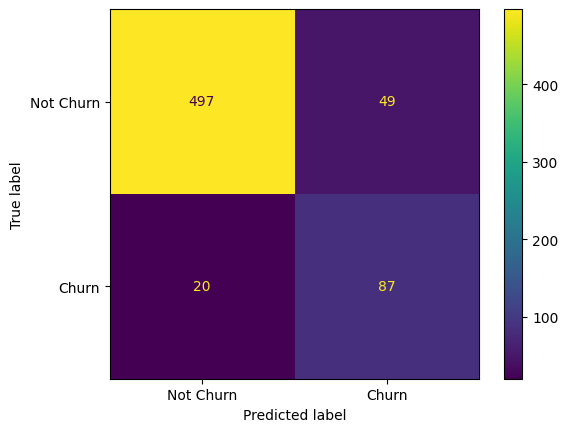

In [80]:
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['Not Churn','Churn'])
cm_disp.plot()

- True Positive = 87
- True Negative = 497
- False Positive = 49
- False Negative = 20

Total samples = 653

Assuming :
1. promotion cost = $20
2. Revenue per promotion = $100

In [115]:
BeforeAfter = {}

promoCost = 20
rev = 100

# Before Machine Learning
## Cost for giving out promotions to every customer
cost_bf = (cm.sum())*5*promoCost

## Promotion that is on target
revenue_bf = 107*5*rev
## Profit
before_ml = revenue_bf - cost_bf
before_ml


-11800

In [116]:
# After Machine Learning
## Cost for giving out promotions to Predicted Churn Customers
cost1_af = (cm[0][1]+cm[1][1])*5*promoCost

## Cost for losing undetected churning customers
cost2_af = cm[1][0]*5*rev

## Revenue from Potetntial Churn Customers
rev_af = cm[1][1]*5*rev

## Profit
after_ml = rev_af - cost1_af - cost2_af
after_ml

19900

In [117]:
BeforeAfter['Before ML'] = before_ml
BeforeAfter['After ML'] = after_ml

In [118]:
pd.DataFrame(list(BeforeAfter.items()), columns = ['Details','Profit'])

,Details,Profit
0,Before ML,-11800
1,After ML,19900


Sebelum menggunakan machine learning: Perusahaan memberikan promosi keapda seluruh customer.
Setelah Machine Laerning: Promosi yang lebih terukur.

Kerugian sebelum implementasi Machine Learning = $11,800\
Profit setelah implementasi machine learning = $19,900\
Terdapat selisih pendapatan sebesar $31,700

## **MODEL LIMITATION**

Beberapa hal yang harus diperhatikan pada saat implementasi machine learning untuk memprediksi customer churn:
1. Nilai Tenure max 31
2. Nilai WarehouseToHome max 36
3. Produk hanya dengan kategori : Laptop & Accessory, Mobile Phone, Fashion, Grocery, & Others. Apabila ada penambahan produk harus dilakukan training model baru.
4. NumberOfDeviceRegistered max 6
5. NumberOfAddress max 11
6. DaySinceLastOrder max 46
7. CashbackAmount max 324.99

## **FEATURE IMPORTANCE**

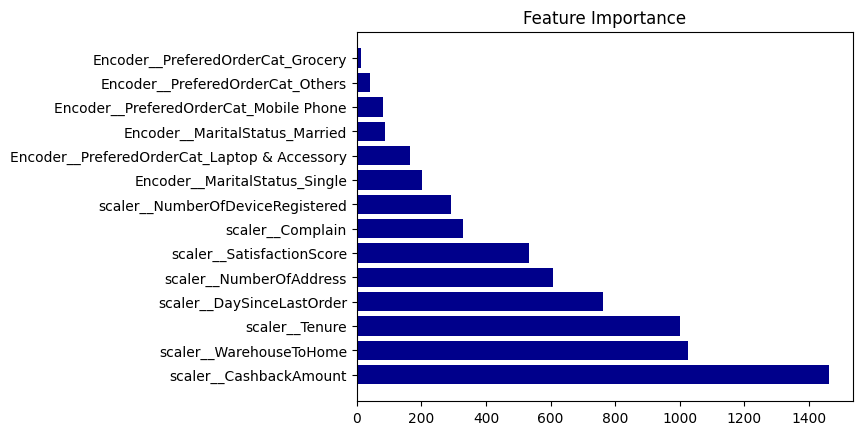

In [147]:
feat_coef = pd.Series(best_lgb_model['model'].feature_importances_, preprocessor.get_feature_names_out()).sort_values(ascending = False)
plt.barh(feat_coef.index,feat_coef.values, color='darkblue')
plt.title('Feature Importance')
plt.show()

## **CONCLUSION AND RECOMMENDATION**
**CONCLUSION**

- Semakin rendah Cashback, Tenure, dan Jarak transaksi (dalam hari), pelanggan semakin cenderung melakukan churn.
- Semakin sering adanya complain, semakin tinggi kemungkinan untuk Churn.
- Semakin jauh jarak antara rumah pelanggan dengan warehouse semakin tinggi potensi churn.

**MachineLearning Model - LightGBM**\
Model dapat mengetahui 92% customer yang tidak churn dan 79% customer yang Churn.
Model memliki nilai prediksi benar untuk customer churn sebesar 66% dan 21% potensi False Negative.

**RECOMMENDATION**

- Menyesuaikan Cashback dengan produk yang dibeli pelanggan.
- Meningkatkan kualitas produk dan layanan untuk memperkecil potensi terjadinya complain.
- Memberikan post-purchase services yang lebih baik. Misalnya: komunikasi, customer support, loyalty, services & guarantee, & customer satisfaction survey.
- Meningkatkan frekuensi  promosi terutama kepada pelanggan – pelanggan yang baru bergabung selama <= 3 bulan.
- Dalam jangka Panjang, Perusahaan dapat melakukan investasi untuk membuka warehouse cabang, sesuai dengan frekuensi customer pada suatu daerah.

**For Model:**
- Mengumpulkan lebih banyak data untuk dilakukan training, terutama pada class Churn(1) agar model dapat memprediksi lebih baik.
- Melakukan Hyperparameter tuning lebih lanjut dengan mengubah atau menambahkan parameter LightGBM.
- Mencoba melakukan feature selection dengan menghapus feature PreferedOrderCat atau menambahkan feature lainnya agar performa model lebih baik.



